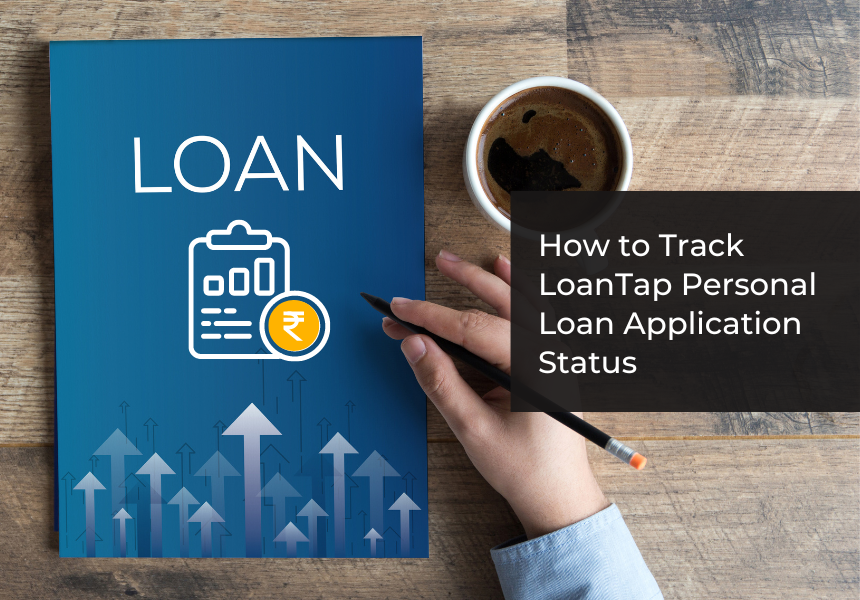

In [32]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [10]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Statistical Analysis

In [13]:
df.duplicated().sum()

0

### Datatype Check

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Missing Value Check

<AxesSubplot:>

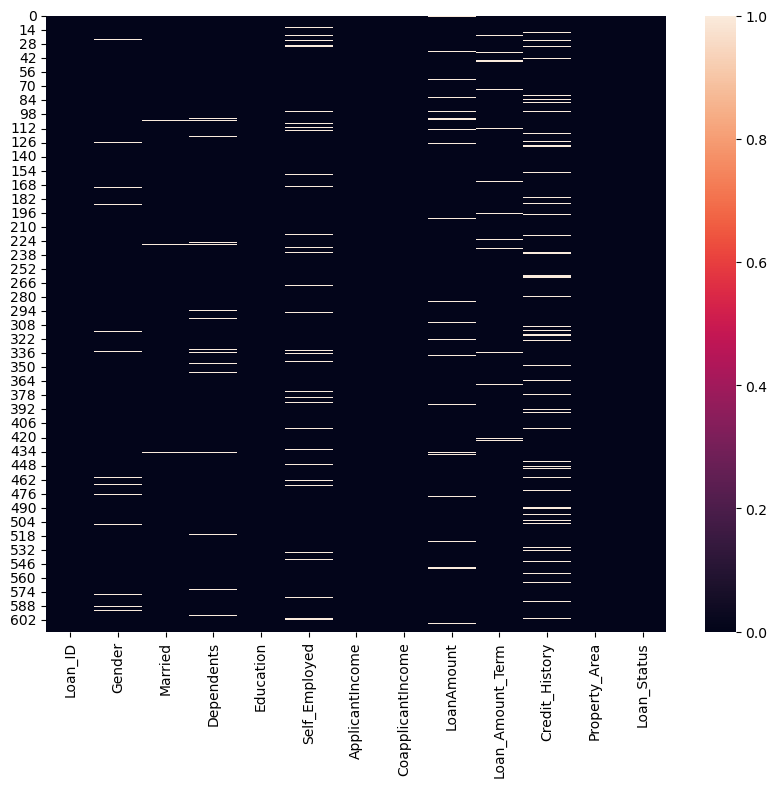

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

In [17]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(df))*100

print(pd.concat([missing_values, percentage_missing_values], axis =1, keys = ['Missing Values', '%Missing data']))

                   Missing Values  %Missing data
Credit_History                 50       8.143322
Self_Employed                  32       5.211726
LoanAmount                     22       3.583062
Dependents                     15       2.442997
Loan_Amount_Term               14       2.280130
Gender                         13       2.117264
Married                         3       0.488599
Loan_ID                         0       0.000000
Education                       0       0.000000
ApplicantIncome                 0       0.000000
CoapplicantIncome               0       0.000000
Property_Area                   0       0.000000
Loan_Status                     0       0.000000


In [18]:
Category = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Property_Area', 'Credit_History', 'Loan_Status']

for i in Category:
    print (i)
    print(df[i].value_counts())
    print('='*100)

Gender
Male      489
Female    112
Name: Gender, dtype: int64
Married
Yes    398
No     213
Name: Married, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Credit_History
1.0    475
0.0     89
Name: Credit_History, dtype: int64
Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64


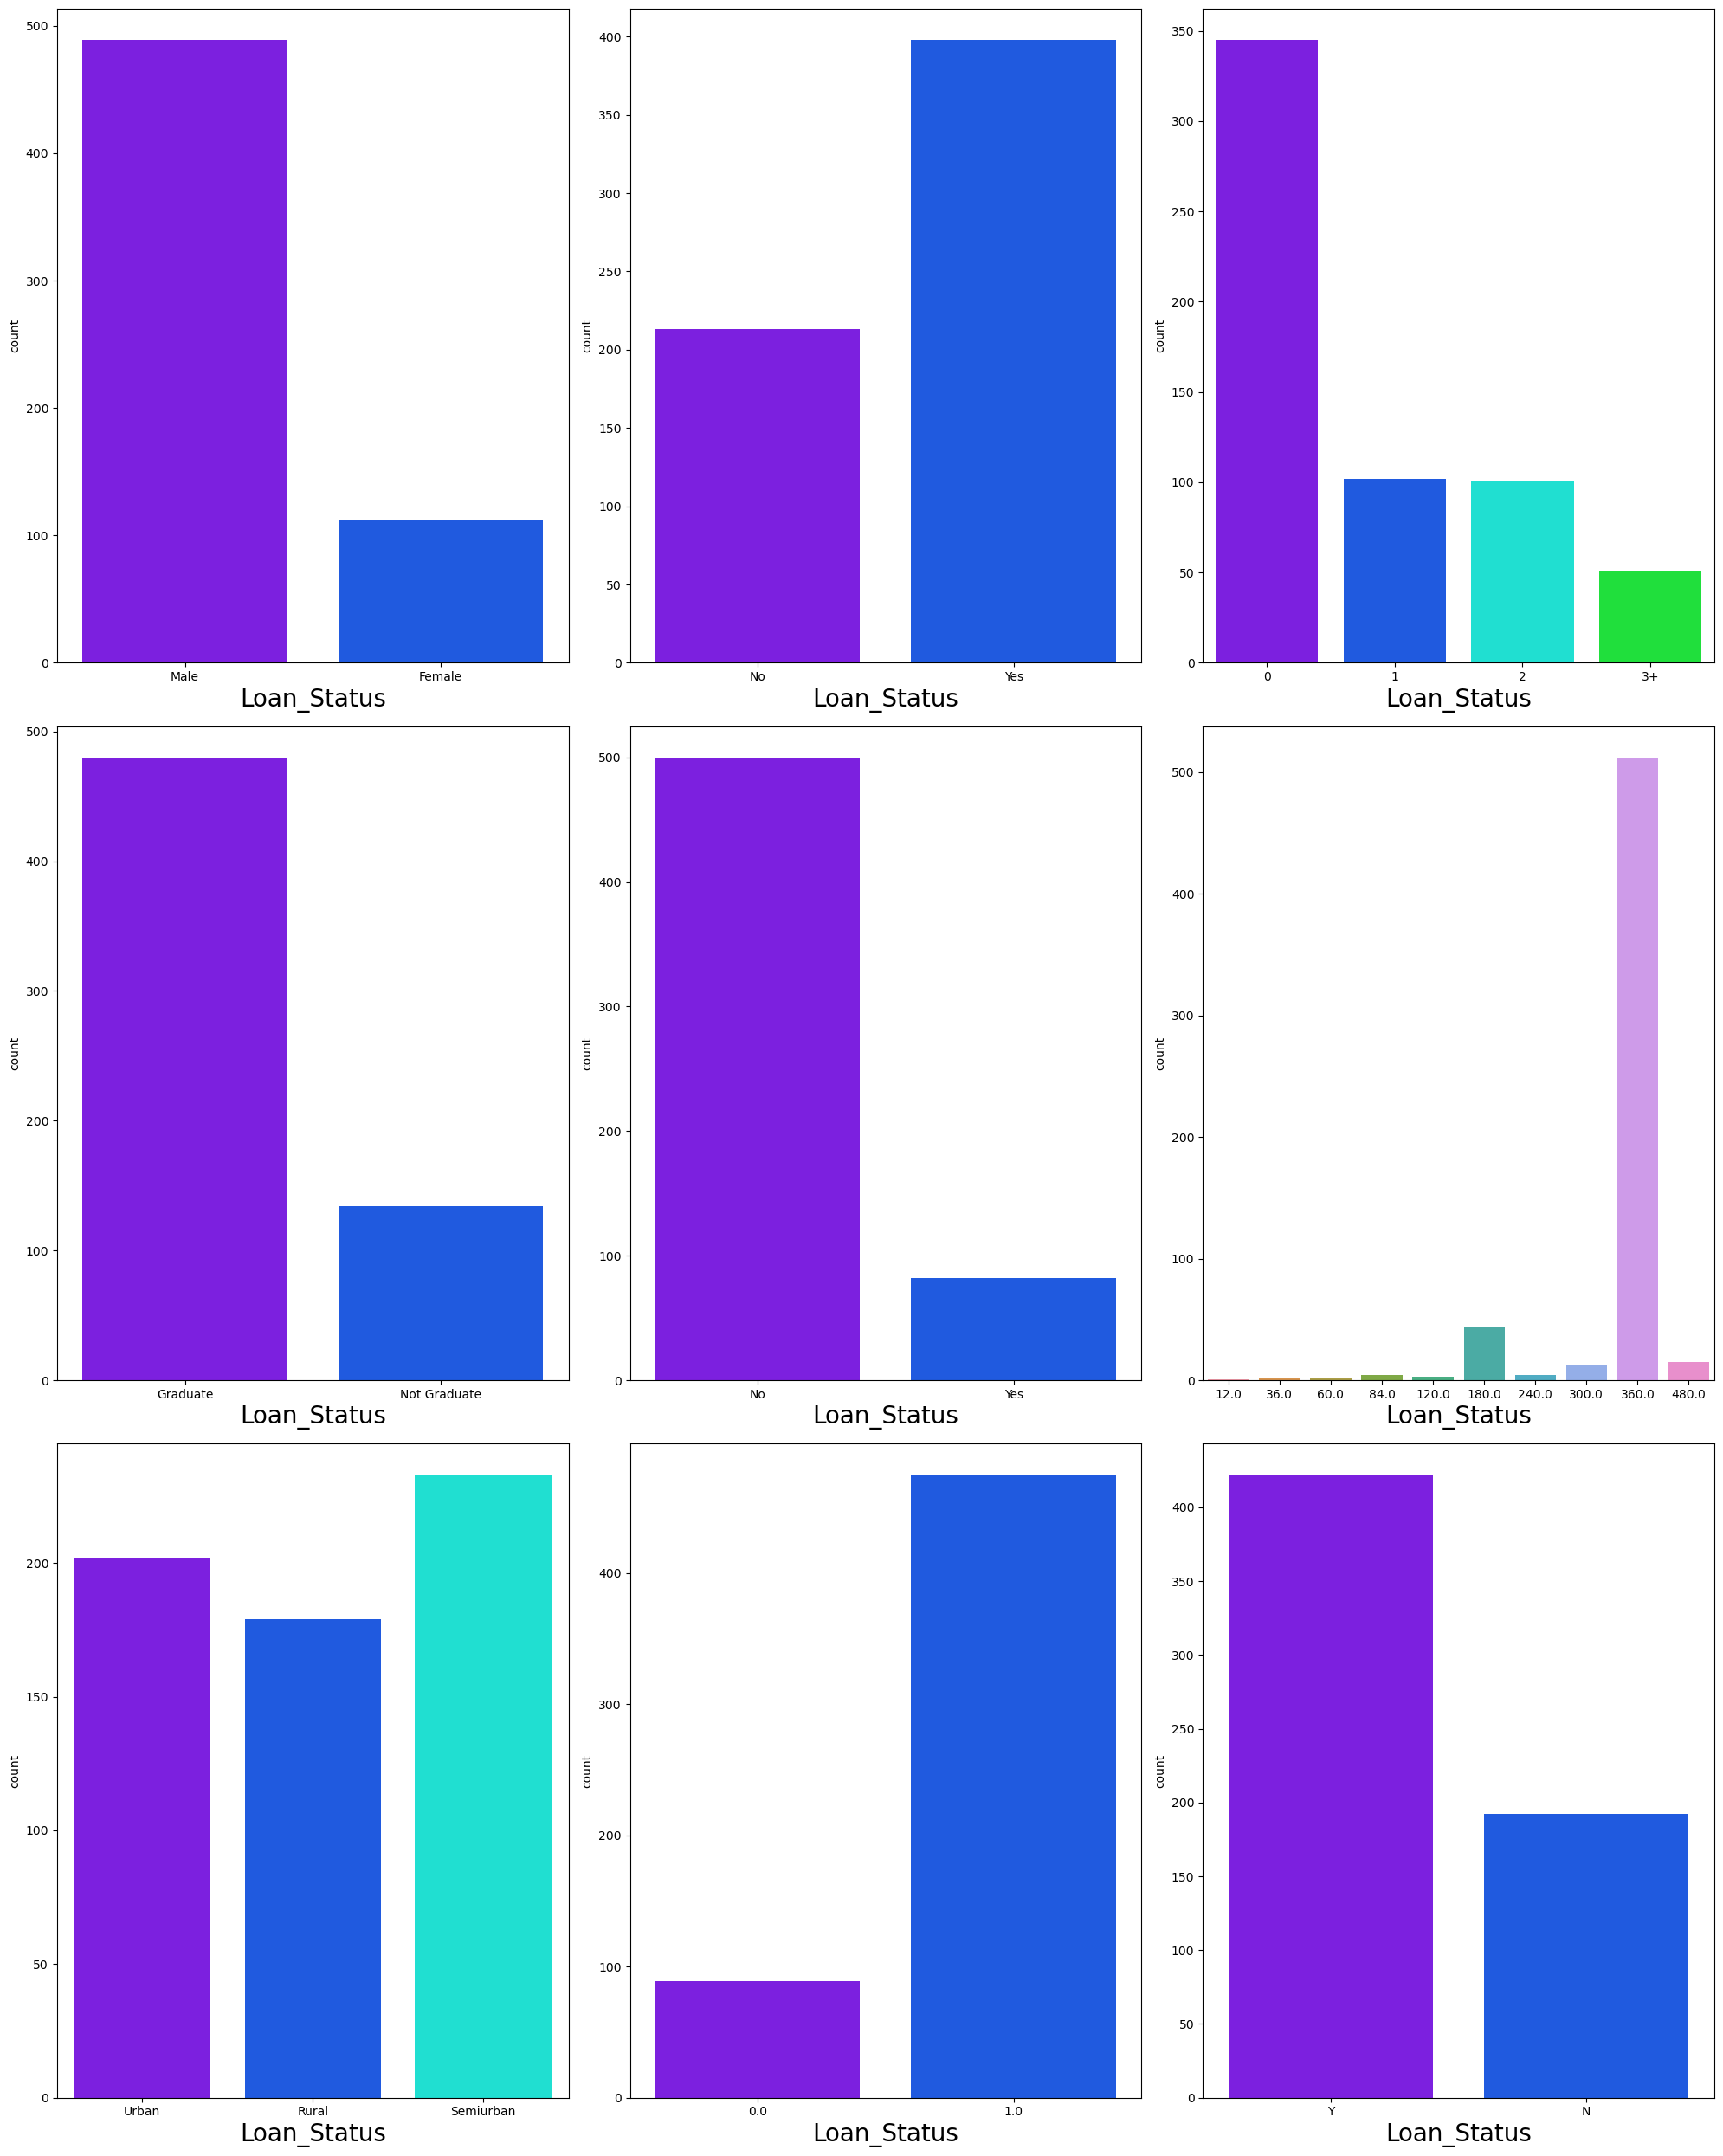

In [20]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,25), facecolor = 'white')
plotnumber = 1 
Category = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Property_Area', 'Credit_History', 'Loan_Status']

for column in Category:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(i, fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

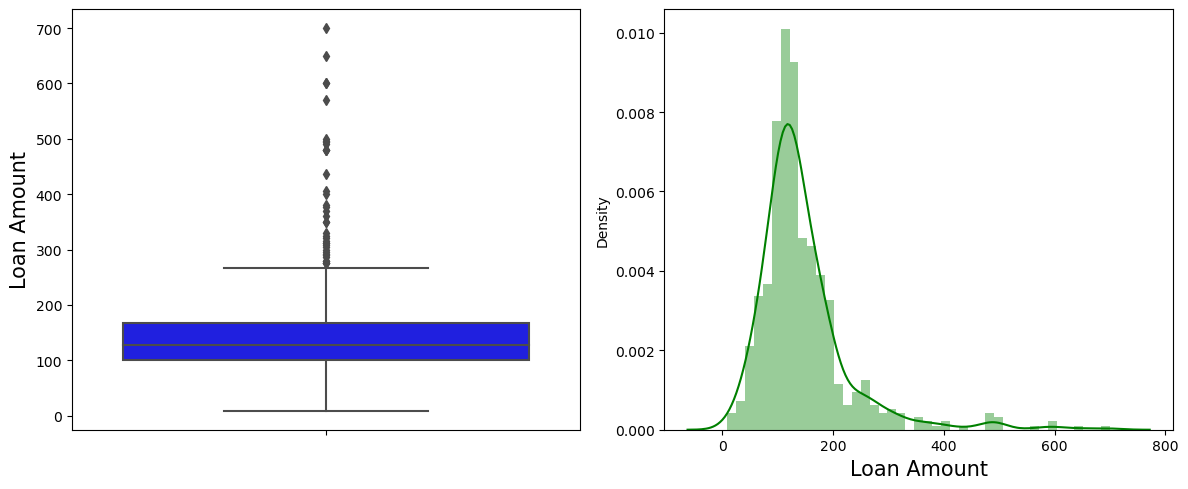

In [22]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y ='LoanAmount', data=df, color= 'b')
plt.ylabel('Loan Amount', fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['LoanAmount'],color= 'g')
plt.xlabel('Loan Amount', fontsize=15)
plt.tight_layout()
plt.show()

In [23]:
print('Mean of Loan amount:', df['LoanAmount'].mean())
print('Median of Loan amount:', df['LoanAmount'].median())

Mean of Loan amount: 146.41216216216216
Median of Loan amount: 128.0


In [25]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

### Missing Value check


In [26]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(df))*100

print(pd.concat([missing_values, percentage_missing_values], axis =1, keys = ['Missing Values', '%Missing data']))

                   Missing Values  %Missing data
Loan_ID                         0            0.0
Gender                          0            0.0
Married                         0            0.0
Dependents                      0            0.0
Education                       0            0.0
Self_Employed                   0            0.0
ApplicantIncome                 0            0.0
CoapplicantIncome               0            0.0
LoanAmount                      0            0.0
Loan_Amount_Term                0            0.0
Credit_History                  0            0.0
Property_Area                   0            0.0
Loan_Status                     0            0.0


## Statistical Matrix

<AxesSubplot:>

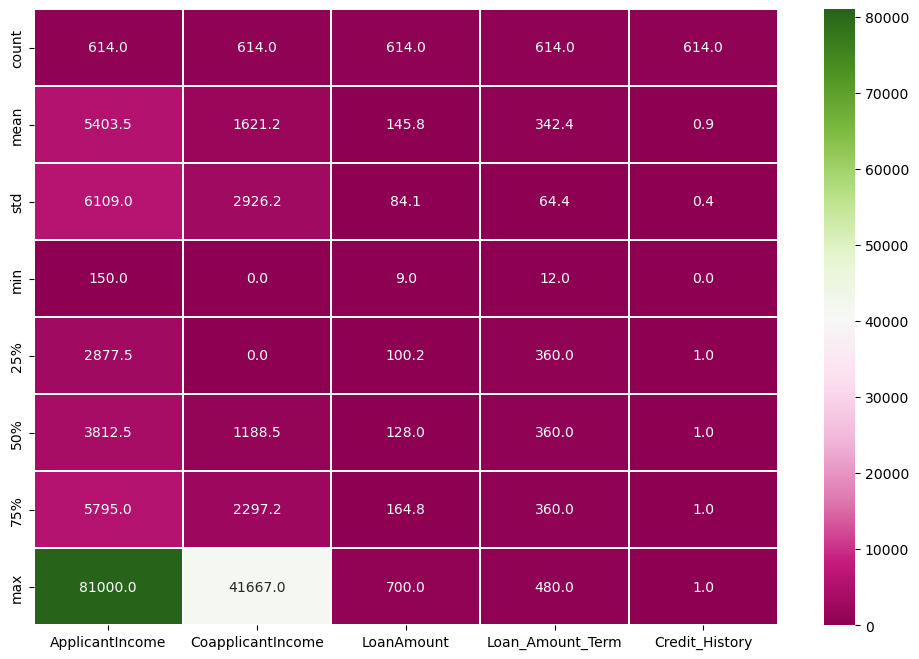

In [27]:
plt.figure(figsize= (12,8))
sns.heatmap(df.describe(), linewidths = 0.1, fmt = '0.1f', annot= True, cmap='PiYG')

In [28]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


## Target Variable

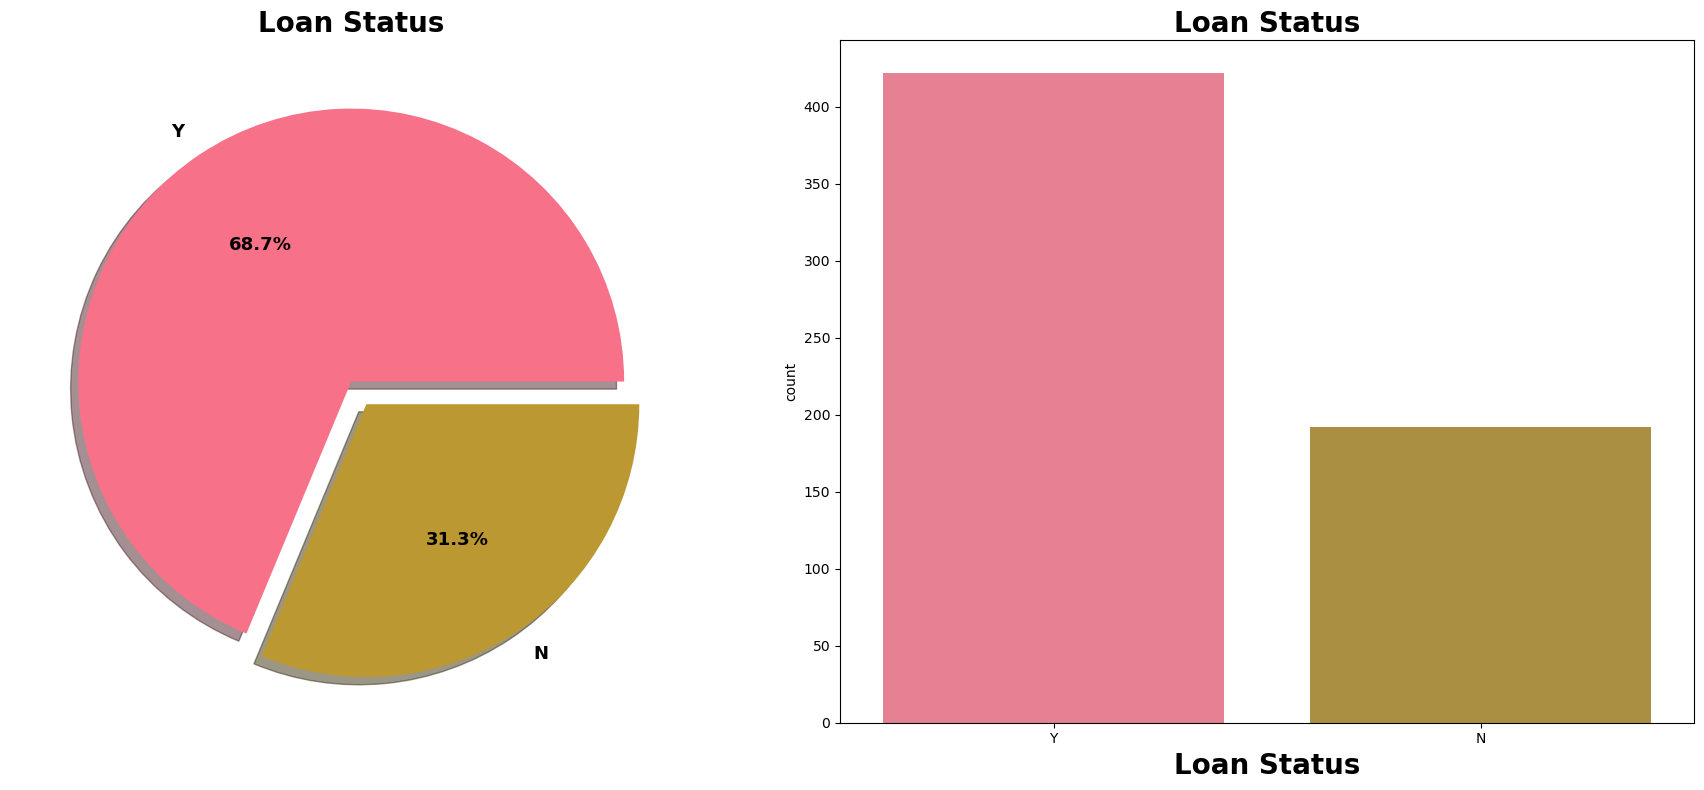

In [33]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Loan_Status'].value_counts().plot.pie(explode=[0,0.1], autopct='%2.1f%%', textprops={'fontweight':'bold', 'fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Loan Status', fontsize =20, fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('Loan_Status', data=df, ax=ax[1])
ax[1].set_title('Loan Status', fontsize=20, fontweight='bold')
ax[1].set_xlabel('Loan Status', fontsize=20, fontweight='bold')
plt.show()

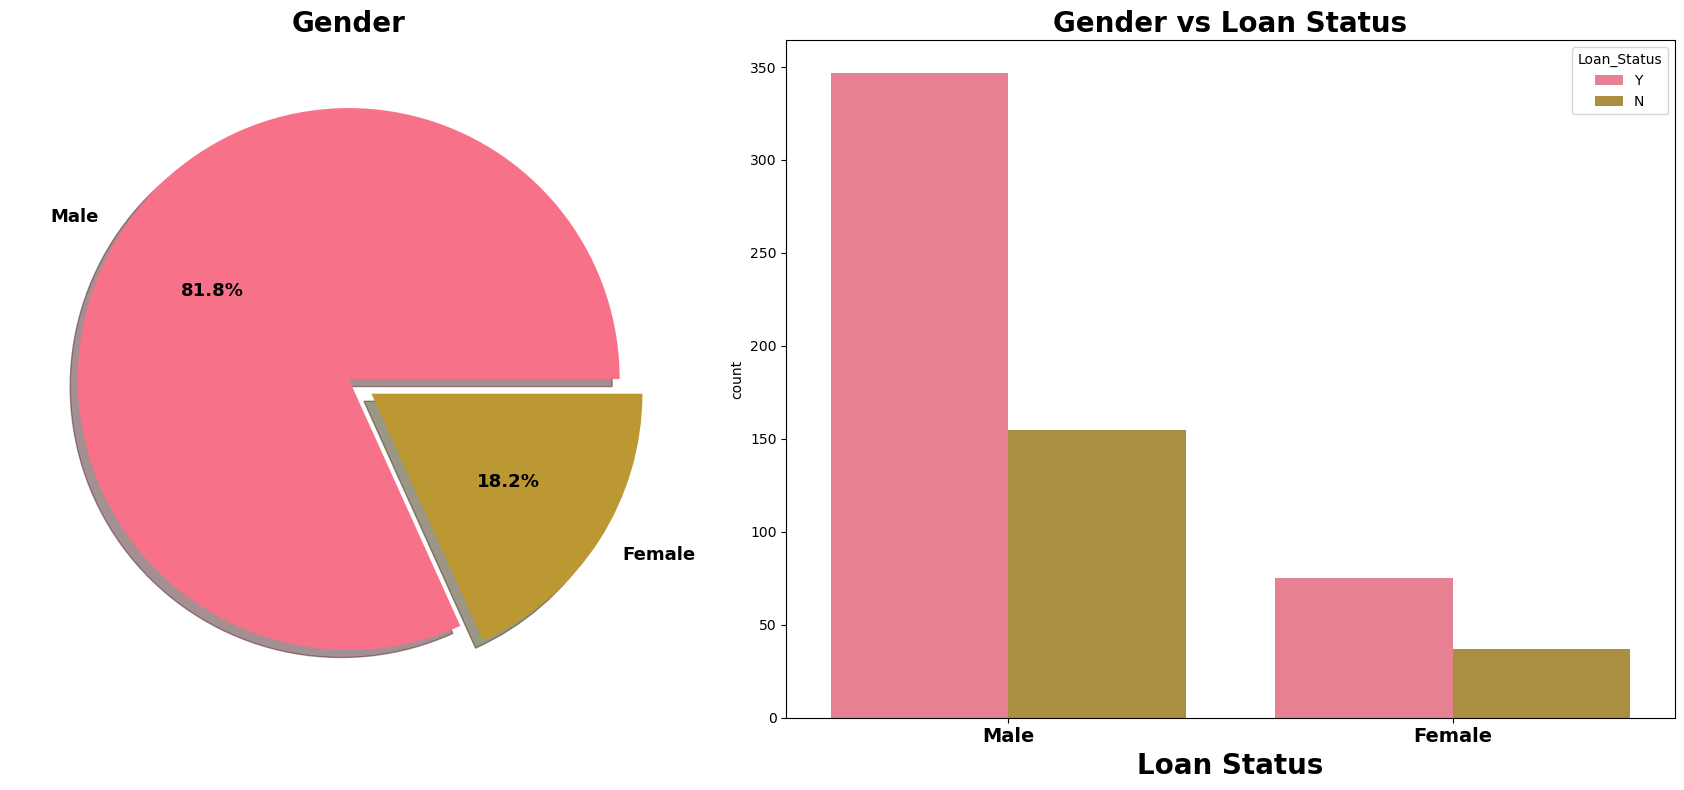

In [34]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Gender'].value_counts().plot.pie(explode=[0,0.1], autopct='%2.1f%%', textprops={'fontweight':'bold', 'fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Gender', fontsize =20, fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('Gender',hue= 'Loan_Status', data=df, ax=ax[1])
ax[1].set_title('Gender vs Loan Status', fontsize=20, fontweight='bold')
ax[1].set_xlabel('Loan Status', fontsize=20, fontweight='bold')
plt.xticks(fontsize=14, fontweight = 'bold')
plt.tight_layout()
plt.show()

In [37]:
pd.crosstab(df['Gender'], df['Loan_Status'], margins = True).style.background_gradient(cmap='summer_r')

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,155,347,502
All,192,422,614


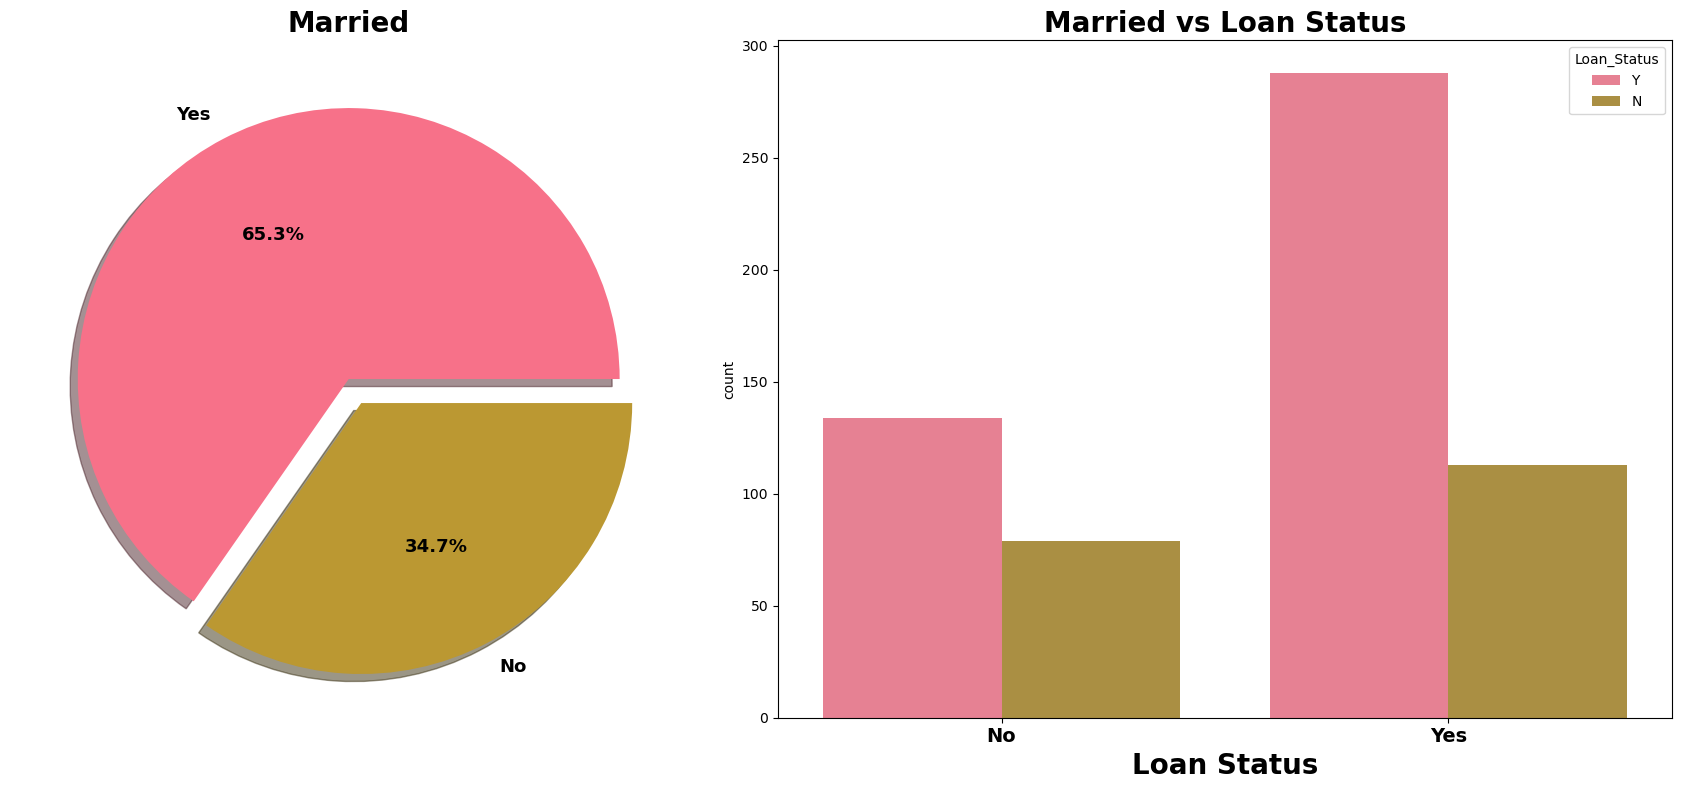

In [38]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Married'].value_counts().plot.pie(explode=[0,0.1], autopct='%2.1f%%', textprops={'fontweight':'bold', 'fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Married', fontsize =20, fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('Married',hue= 'Loan_Status', data=df, ax=ax[1])
ax[1].set_title('Married vs Loan Status', fontsize=20, fontweight='bold')
ax[1].set_xlabel('Loan Status', fontsize=20, fontweight='bold')
plt.xticks(fontsize=14, fontweight = 'bold')
plt.tight_layout()
plt.show()

In [40]:
pd.crosstab([df['Gender'], df['Married']],[df.Loan_Status], margins = True).style.background_gradient(cmap='summer_r')

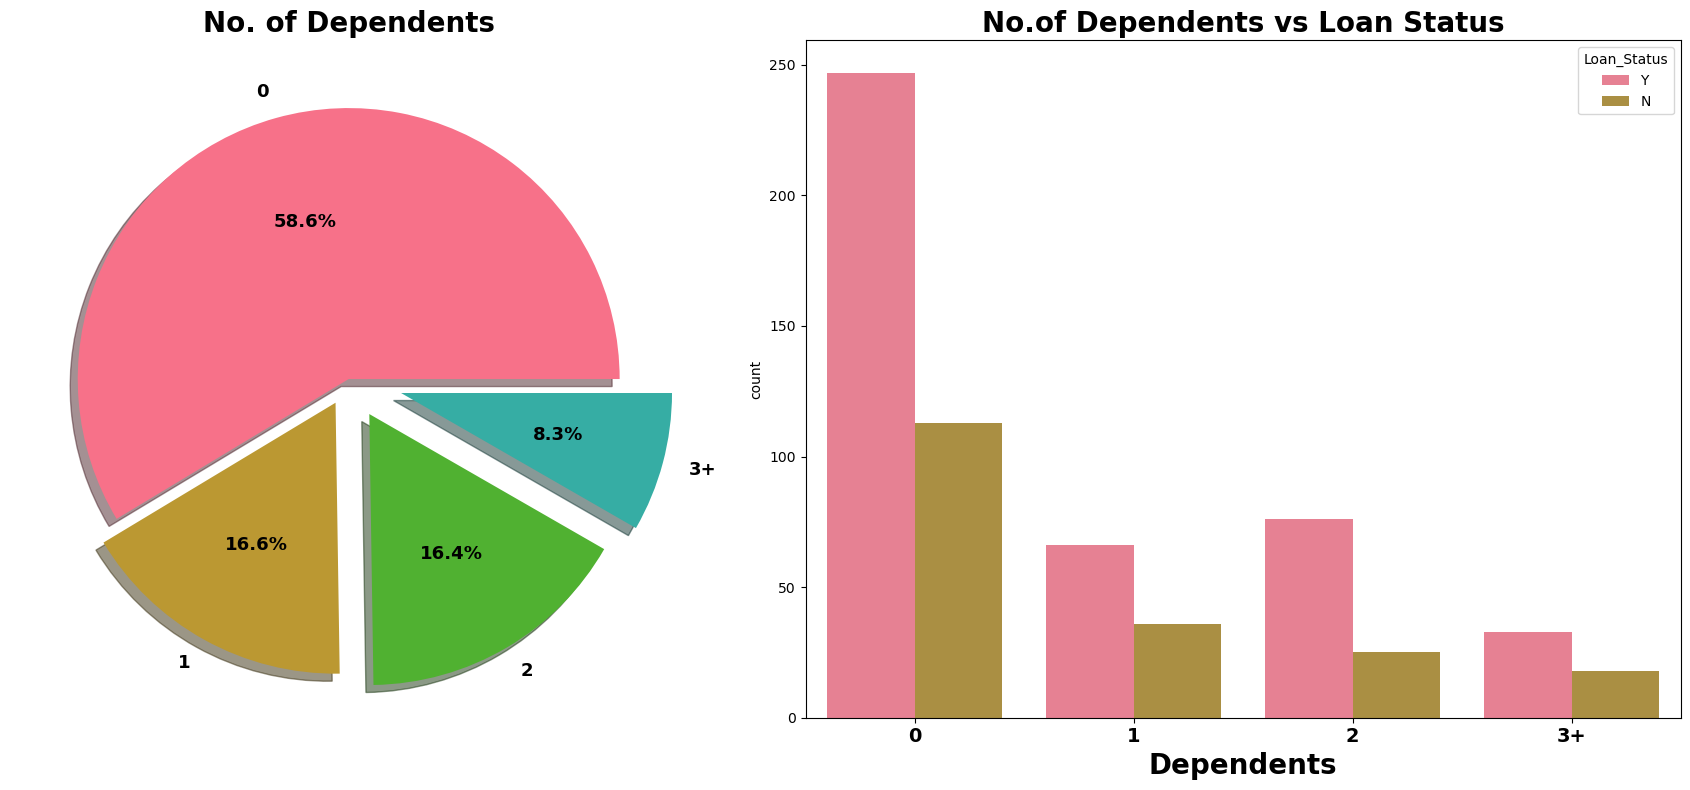

In [43]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Dependents'].value_counts().plot.pie(explode=[0,0.1,0.15,0.2], autopct='%2.1f%%', textprops={'fontweight':'bold', 'fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('No. of Dependents', fontsize =20, fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('Dependents',hue= 'Loan_Status', data=df, ax=ax[1])
ax[1].set_title('No.of Dependents vs Loan Status', fontsize=20, fontweight='bold')
ax[1].set_xlabel('Dependents', fontsize=20, fontweight='bold')
plt.xticks(fontsize=14, fontweight = 'bold')
plt.tight_layout()
plt.show()

In [45]:
pd.crosstab([df['Dependents']],[df.Loan_Status,df['Gender']], margins = True).style.background_gradient(cmap='summer_r')

In [46]:
pd.crosstab([df['Dependents'], df['Gender']],[df.Loan_Status], margins = True).style.background_gradient(cmap='summer_r')

In [47]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Education vs Loan Status

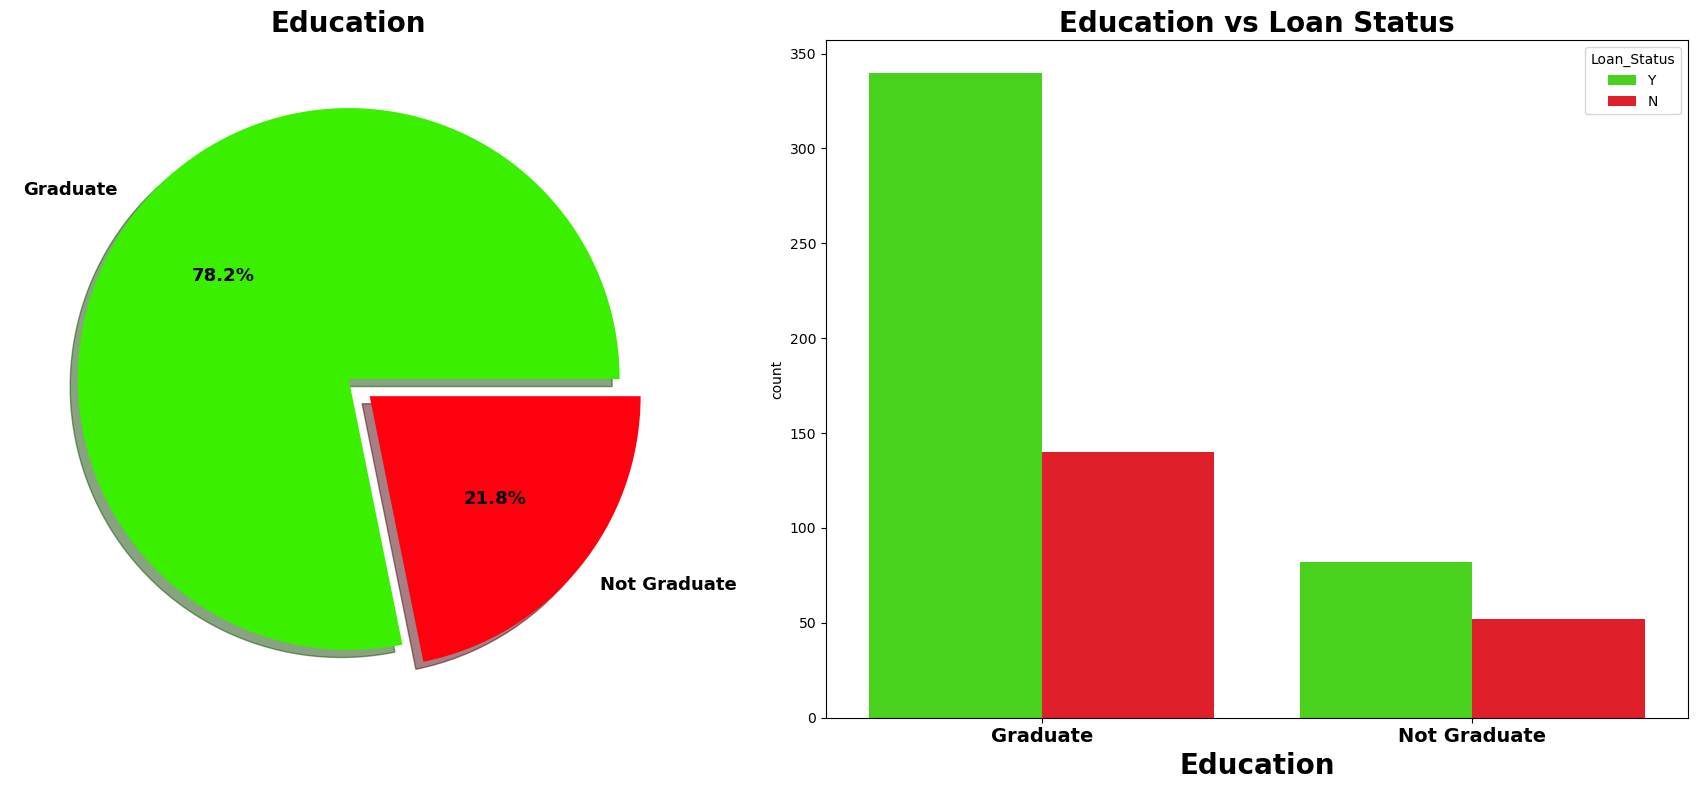

In [49]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('prism')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Education'].value_counts().plot.pie(explode=[0,0.1], autopct='%2.1f%%', textprops={'fontweight':'bold', 'fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Education', fontsize =20, fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('Education',hue= 'Loan_Status', data=df, ax=ax[1])
ax[1].set_title('Education vs Loan Status', fontsize=20, fontweight='bold')
ax[1].set_xlabel('Education', fontsize=20, fontweight='bold')
plt.xticks(fontsize=14, fontweight = 'bold')
plt.tight_layout()
plt.show()

In [50]:
pd.crosstab([df['Education'], df['Gender']],[df.Loan_Status], margins = True).style.background_gradient(cmap='summer_r')

## Encodeing categorical data

In [51]:
category = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in category:
    df[i] = le.fit_transform(df[i])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


# Features selection and Engineering

### 1.Outliers Detection and Removal

In [53]:
Numerical = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term' ]

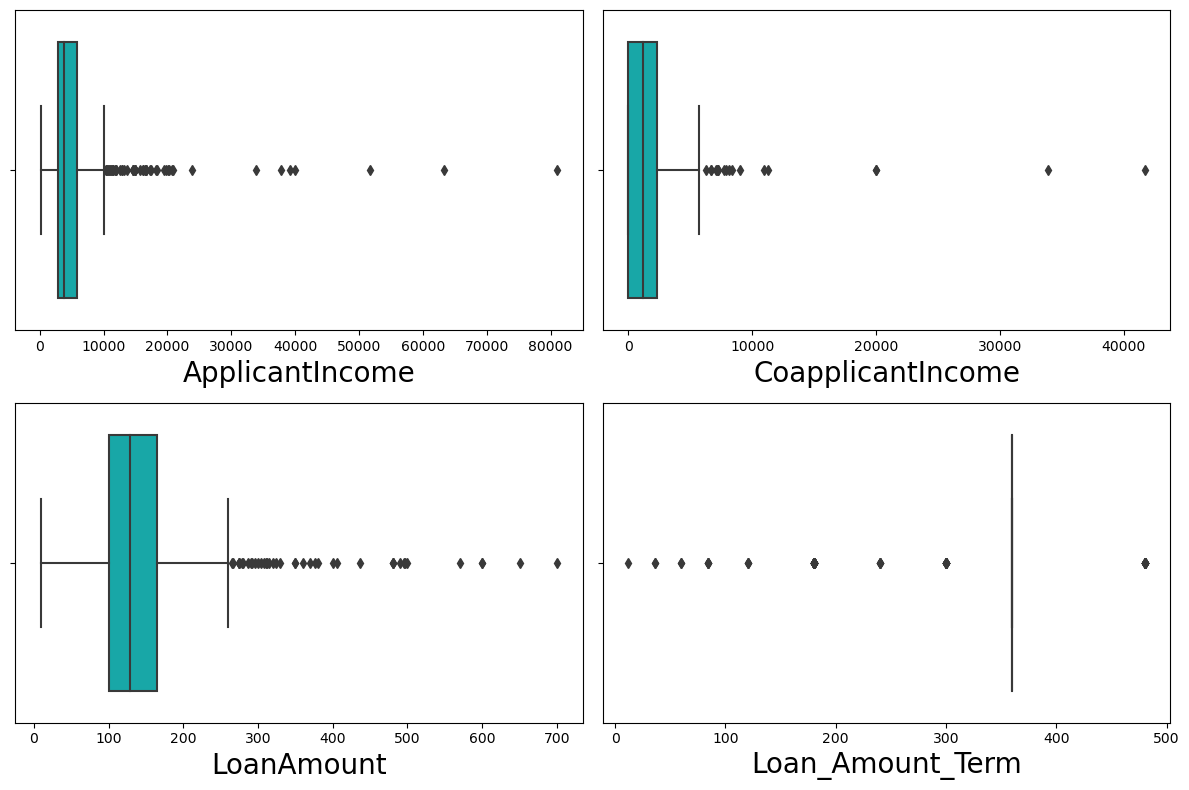

In [55]:
plt.figure(figsize = (12,8), facecolor = 'white')
plotnumber=1

for column in Numerical:
    if plotnumber <=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color='c')
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [56]:
df.drop(['Loan_ID'], axis=1, inplace=True)

In [57]:
df['Dependents']= df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [58]:
df['Dependents']= pd.to_numeric(df['Dependents'])

In [63]:
from scipy.stats import zscore
z= np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis =1)]

print('Shape of the dataframe before removing outliers: ', df.shape)
print('Shape of the dataframe after removing outliers: ', df1.shape)
print('percentage of data loss post outlier removal: ', (df.shape[0]- df1.shape[0])/df.shape[0]*100)

df = df1.copy()

Shape of the dataframe before removing outliers:  (614, 12)
Shape of the dataframe after removing outliers:  (577, 12)
percentage of data loss post outlier removal:  6.026058631921824


In [64]:
print('\033[1m'+'Percentage Data Loss: '+'\033[0m]',((614-577)/614)*100,'%')

Percentage Data Loss: ] 6.026058631921824 %


## 2.Skewness of features

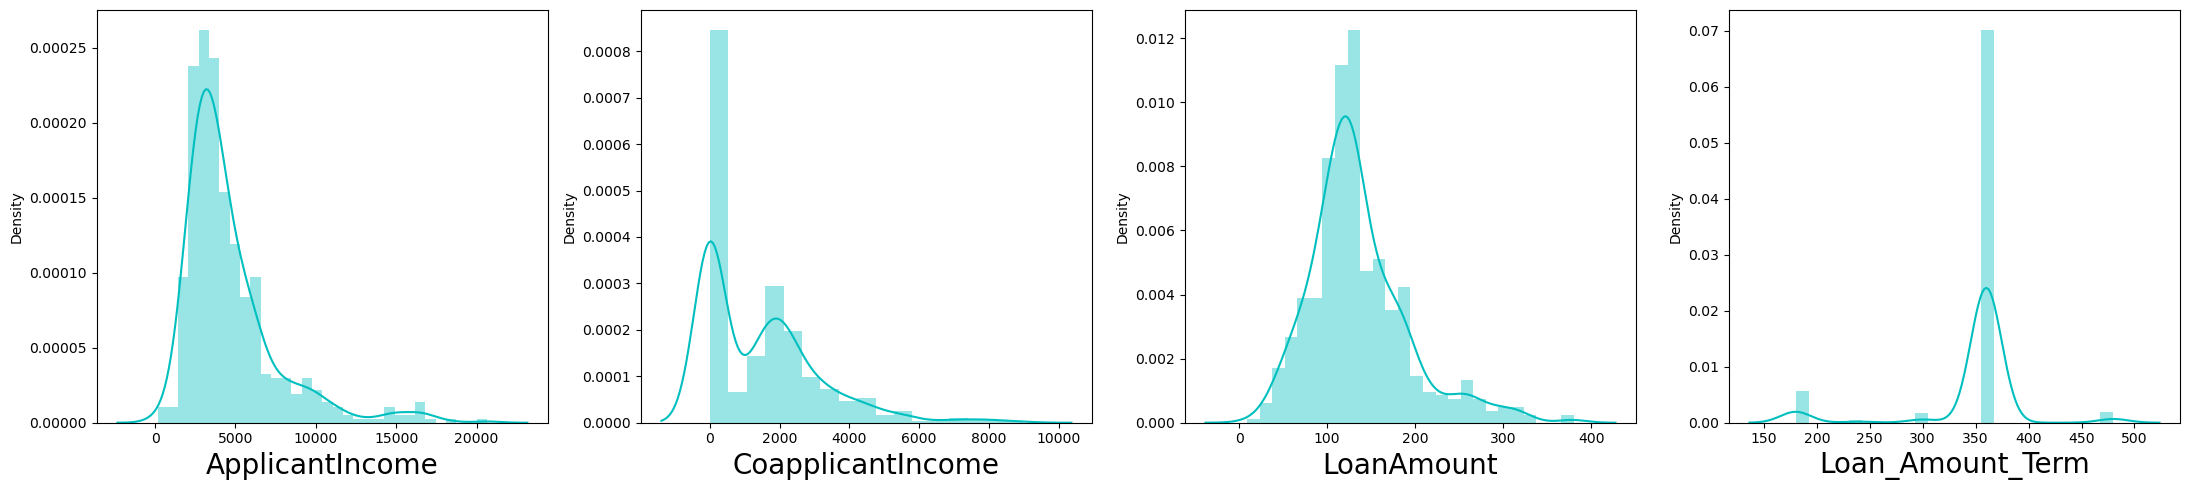

In [68]:
plt.figure(figsize = (22,5), facecolor = 'white')
plotnumber=1

for column in Numerical:
    if plotnumber <=4:
        ax = plt.subplot(1,4,plotnumber)
        sns.distplot(df[column],color='c')
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

In [69]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [79]:
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [84]:
df[skew] = scaler.fit_transform(df[skew].values)
df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.692671,-1.094644,0.012235
1,0.256426,0.601875,0.012235
2,-0.512954,-1.094644,-1.451184
3,-0.787328,0.872411,-0.142504
4,0.738104,-1.094644,0.248910


In [85]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.224262
CoapplicantIncome   -0.047008
LoanAmount          -0.039839
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

# 3.Corrleation

In [86]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.060488,0.230804,0.172781,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.026506,0.320964,0.182827,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.106997,-0.006515,0.131237,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.174486,0.031017,-0.126718,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.206247,-0.078911,0.116655,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.060488,-0.026506,0.106997,-0.174486,0.206247,1.000000,-0.345733,0.425021,-0.070351,0.027488,-0.011206,-0.001858
CoapplicantIncome,0.230804,0.320964,-0.006515,0.031017,-0.078911,-0.345733,1.000000,0.231751,-0.012013,0.001770,-0.081613,0.071962
LoanAmount,0.172781,0.182827,0.131237,-0.126718,0.116655,0.425021,0.231751,1.000000,0.049745,-0.004744,-0.099469,-0.023075
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.070351,-0.012013,0.049745,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.027488,0.001770,-0.004744,0.027392,1.000000,-0.008121,0.560936


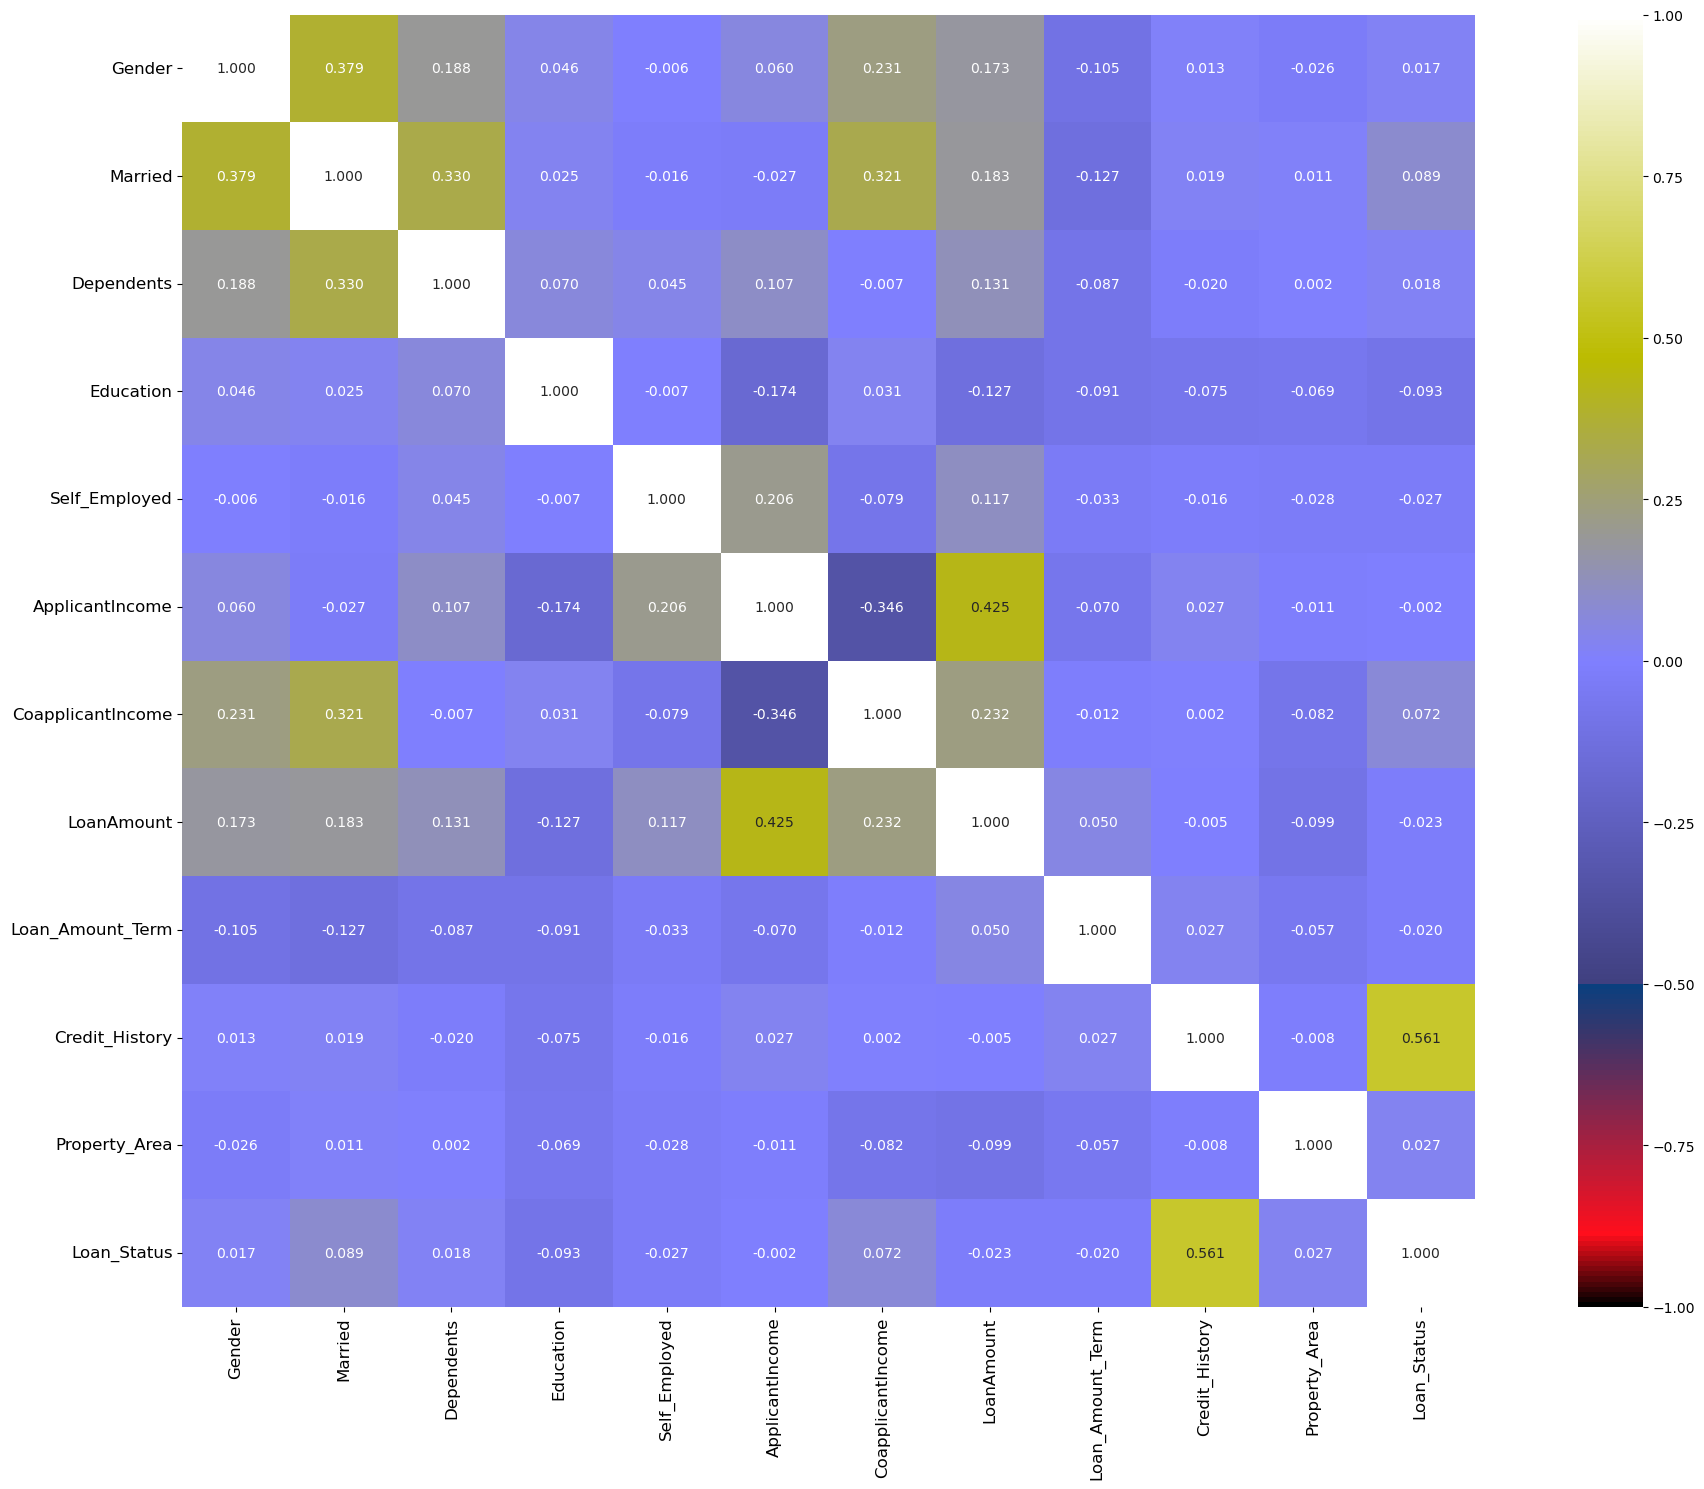

In [87]:
plt.figure(figsize= (21,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f',
           annot_kws= {'size' : 10}, cmap = 'gist_stern')
plt.xticks(fontsize =12)
plt.yticks(fontsize =12)
plt.show()

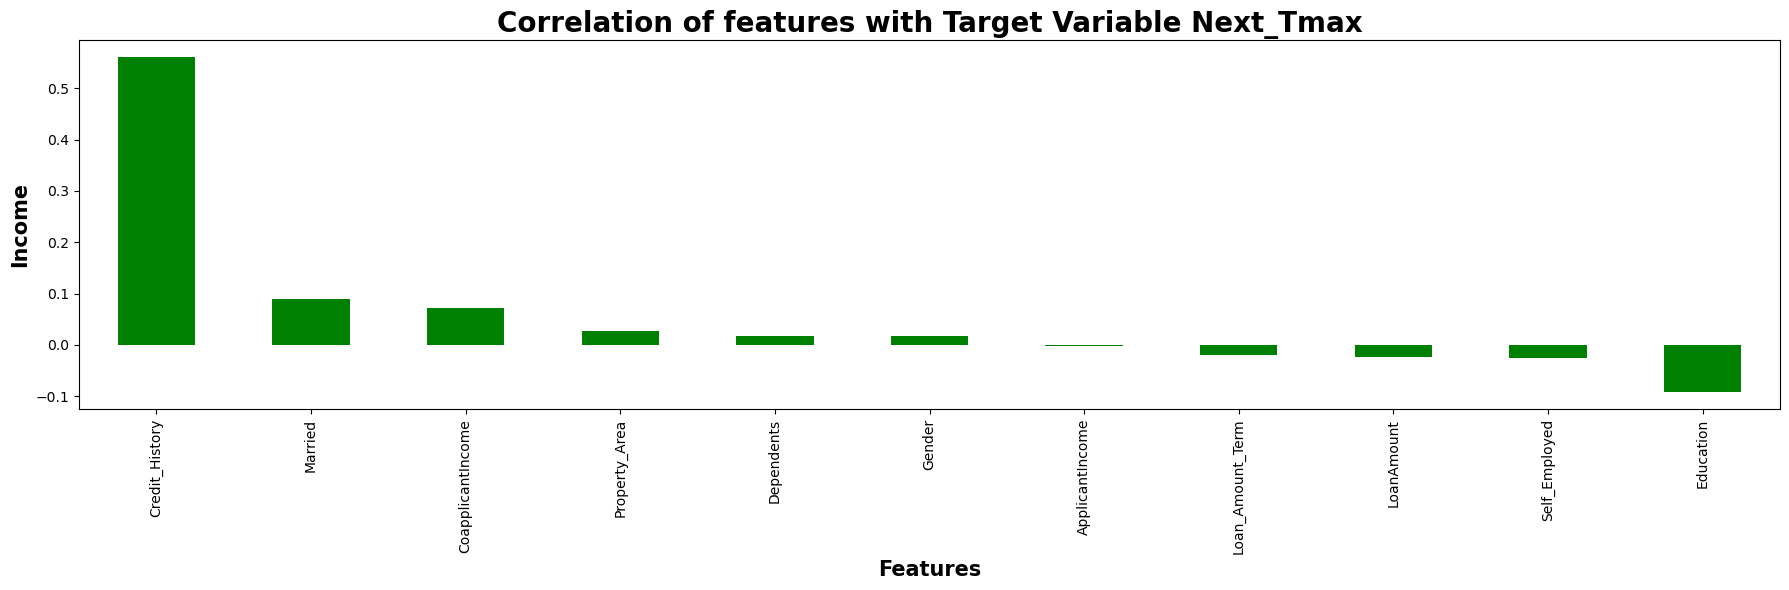

In [88]:
plt.figure(figsize= (18,6))
df.corr()['Loan_Status'].drop(['Loan_Status']).sort_values(ascending=False).plot(kind= 'bar', color= 'g')
plt.xlabel('Features', fontsize=15, fontweight='bold')
plt.ylabel('Income', fontsize=15, fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmax', fontsize= 20, fontweight='bold')
plt.show()

## 4. Checking Variance_inflation_factor

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['Features']= df.columns
vif

,VIF,Features
0,6.136172,Gender
1,3.935926,Married
2,1.782189,Dependents
3,1.355024,Education
4,1.194039,Self_Employed
5,1.740070,ApplicantIncome
6,1.602526,CoapplicantIncome
7,1.573457,LoanAmount
8,10.398512,Loan_Amount_Term
9,9.478994,Credit_History


## 5.Balancing Imbalanced target feature feature

In [90]:
df.Loan_Status.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

### Balancing using SMOTE

In [94]:
from imblearn.over_sampling import SMOTE

In [95]:
X = df.drop(['Loan_Status'], axis =1)
Y = df['Loan_Status']

In [96]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X,Y)

In [97]:
Y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

## Standard Scaling 

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

# Machine Learnings Model Building

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso

In [101]:
x_train, x_test, y_train, y_test = train_test_split(X_scale, Y, random_state=99, test_size=0.3)
print('Training feature matrix size:', x_train.shape)
print('Training target vector size:', y_train.shape)
print('Test feature matrix size:', x_test.shape)
print('Test target vector size:', y_test.shape)

Training feature matrix size: (557, 11)
Training target vector size: (557,)
Test feature matrix size: (239, 11)
Test target vector size: (239,)


In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8075313807531381 on Random_state 129


## Logistics Regression Model

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=129, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8075313807531381


Confusion matrix of Logistics Regression : 
 [[ 81  38]
 [  8 112]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.91      0.68      0.78       119
           1       0.75      0.93      0.83       120

    accuracy                           0.81       239
   macro avg       0.83      0.81      0.80       239
weighted avg       0.83      0.81      0.80       239



## Finding Optimal Value of n_neighbors for KNN

In [113]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = []
for K in range(25):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)
    
    model.fit(x_train, Y_train)
    y_pred= model.predict(X_test)
    error = sqrt(mean_squared_error(Y_test, y_pred))
    rmse_val.append(error)
    print('RMSE value for k = ', K , 'is:', error)

RMSE value for k =  1 is: 0.6370696512829457
RMSE value for k =  2 is: 0.6628201444834446
RMSE value for k =  3 is: 0.6628201444834446
RMSE value for k =  4 is: 0.7144650103721141
RMSE value for k =  5 is: 0.681494788273186
RMSE value for k =  6 is: 0.6564772220696118
RMSE value for k =  7 is: 0.6436038699561977
RMSE value for k =  8 is: 0.6628201444834446
RMSE value for k =  9 is: 0.6337772796238155
RMSE value for k =  10 is: 0.6596563071135183
RMSE value for k =  11 is: 0.665968951492083
RMSE value for k =  12 is: 0.665968951492083
RMSE value for k =  13 is: 0.6403450952448876
RMSE value for k =  14 is: 0.6532826667514027
RMSE value for k =  15 is: 0.6271406854371226
RMSE value for k =  16 is: 0.6564772220696118
RMSE value for k =  17 is: 0.6237959112659636
RMSE value for k =  18 is: 0.6102335104191622
RMSE value for k =  19 is: 0.6237959112659636
RMSE value for k =  20 is: 0.6370696512829457
RMSE value for k =  21 is: 0.6170519735608289
RMSE value for k =  22 is: 0.6337772796238155


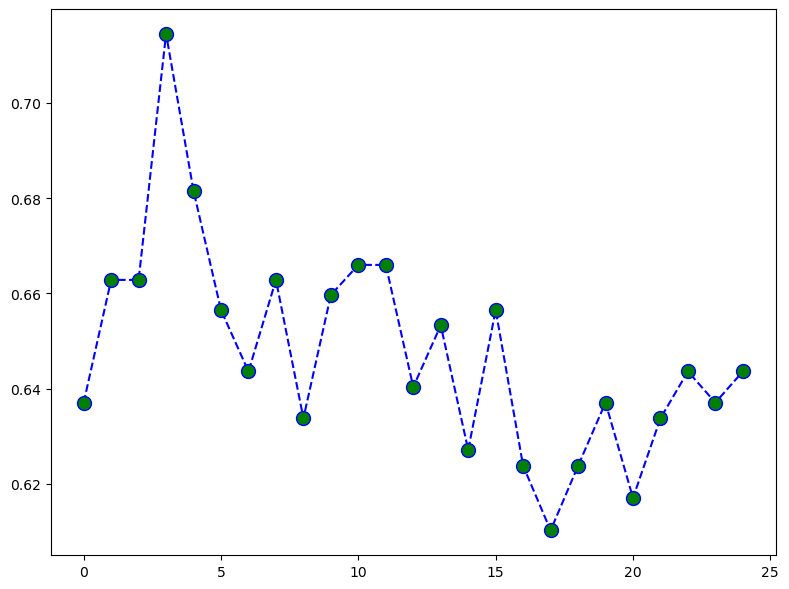

In [114]:
plt.figure(figsize = (8,6))
plt.plot(range(25), rmse_val, color='blue', linestyle= 'dashed', marker= 'o', markerfacecolor= 'green', markersize=10)

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.7573221757322176


Confusion matrix : 
 [[ 74  45]
 [ 13 107]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.62      0.72       119
           1       0.70      0.89      0.79       120

    accuracy                           0.76       239
   macro avg       0.78      0.76      0.75       239
weighted avg       0.78      0.76      0.75       239





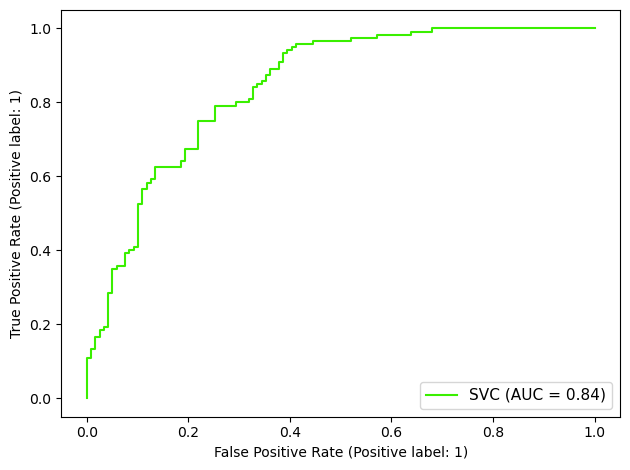

Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.7824267782426778


Confusion matrix : 
 [[ 77  42]
 [ 10 110]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.65      0.75       119
           1       0.72      0.92      0.81       120

    accuracy                           0.78       239
   macro avg       0.80      0.78      0.78       239
weighted avg       0.80      0.78      0.78       239





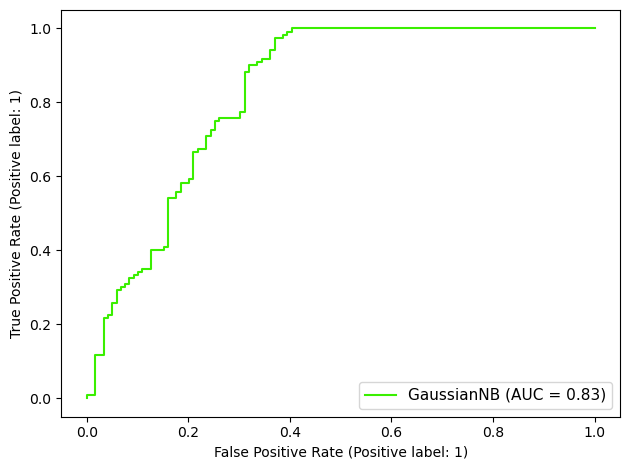

Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy Score :
 0.7615062761506276


Confusion matrix : 
 [[96 23]
 [34 86]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.74      0.81      0.77       119
           1       0.79      0.72      0.75       120

    accuracy                           0.76       239
   macro avg       0.76      0.76      0.76       239
weighted avg       0.76      0.76      0.76       239





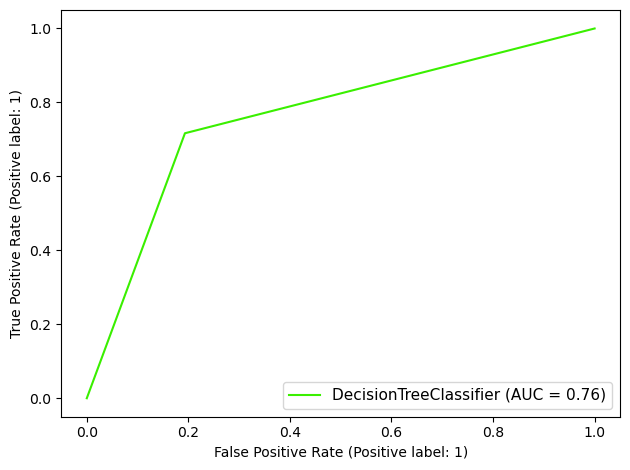

Classification ML Algorithm Evaluation Matrix KNeighborsClassifier(n_neighbors=3) is


Accuracy Score :
 0.7364016736401674


Confusion matrix : 
 [[91 28]
 [35 85]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.72      0.76      0.74       119
           1       0.75      0.71      0.73       120

    accuracy                           0.74       239
   macro avg       0.74      0.74      0.74       239
weighted avg       0.74      0.74      0.74       239





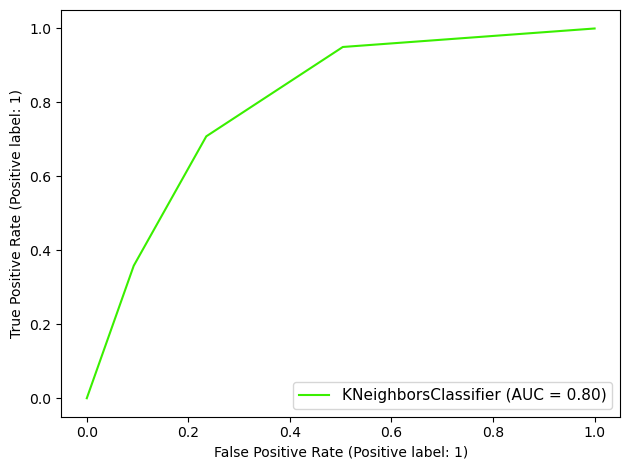

Classification ML Algorithm Evaluation Matrix RandomForestClassifier() is


Accuracy Score :
 0.8451882845188284


Confusion matrix : 
 [[ 96  23]
 [ 14 106]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       119
           1       0.82      0.88      0.85       120

    accuracy                           0.85       239
   macro avg       0.85      0.85      0.84       239
weighted avg       0.85      0.85      0.84       239





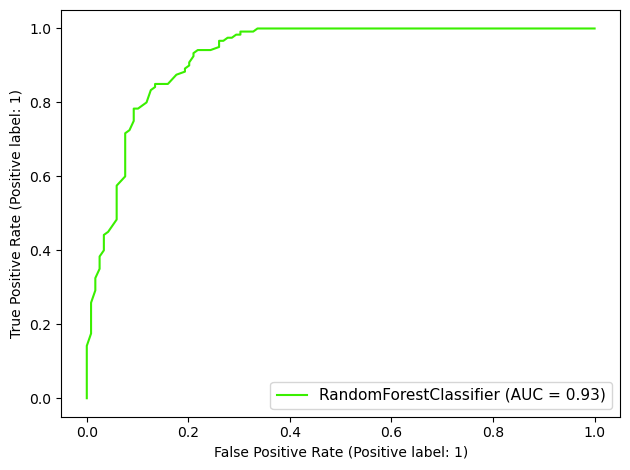

Classification ML Algorithm Evaluation Matrix ExtraTreesClassifier() is


Accuracy Score :
 0.8451882845188284


Confusion matrix : 
 [[101  18]
 [ 19 101]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       119
           1       0.85      0.84      0.85       120

    accuracy                           0.85       239
   macro avg       0.85      0.85      0.85       239
weighted avg       0.85      0.85      0.85       239





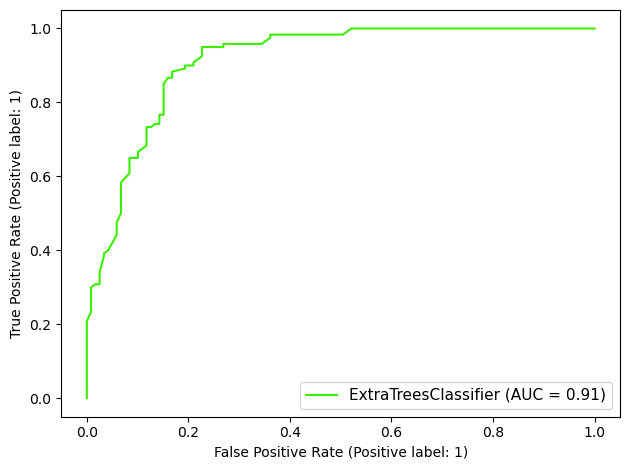

In [128]:


from sklearn.metrics import plot_roc_curve
model=[ 
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    disp = plot_roc_curve(m,X_test,Y_test)   
    plt.legend(prop={'size':11}, loc='lower right')
    plt.show()

## Hyper Parameter Tunning: GridSearchCV

In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
parameter = {'bootstrap': [True], 'max_depth': [5,10,20,40,50,60],
            'max_features': ['auto', 'log2'],
            'criterion': ['gini', 'entropy'],
            'n_estimators': [5,10,15,25,50,60,70]}

In [131]:
GCV = GridSearchCV(RandomForestClassifier(), parameter, verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.795 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.634 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.730 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.703 total time=   0.0s
[CV 5

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [133]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 'log2',
 'n_estimators': 60}

## Final Model

In [137]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 50, max_depth=20 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8410041841004184


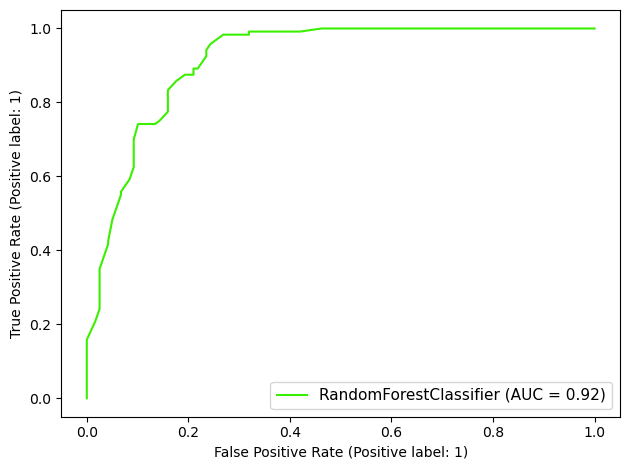

<Figure size 1000x1000 with 0 Axes>

Auc Score :
] 0.8409313725490195


In [139]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(Final_mod,X_test, Y_test)
plt.legend(prop= {'size':11}, loc= 'lower right')
plt.figure(figsize = (10,10))
plt.show()
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n]', auc_score)

# Saving Model

In [140]:
import joblib
joblib.dump(Final_mod, 'Loan_Status_Final.pkl')

['Loan_Status_Final.pkl']